In [1]:
#project to analyse performance of MSD in IPLs from 2008-2019 and to see if he's still fit to play cricket.
import pandas as pd

In [3]:
df=pd.read_csv("C:\\Users\\Ambarish Deb\\Downloads\\deliveries.csv")

In [4]:
rf=pd.read_csv("C:\\Users\\Ambarish Deb\\Downloads\\matches.csv")

In [5]:
df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [6]:
rf.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [7]:
#To analyse MSD's data and see if he's still fit to play.
#Two ways- 1. Take only MSD's data 2> Do stats for all players and filter required player's data.
#Given that multiple fields are present- like captain, fielder etc. Analysis can be done to see good captains and fielders as well. But a topic for another time.

In [8]:
#Consider only those deliveries where Batsman is MSD
len(df.batsman.unique())

516

In [11]:
df = df[df.batsman=="MS Dhoni"]
#dataset now only has MSD's data.

In [13]:
#From the matches dataset we need to filter out the matches where MSD has played for our analysis.
#To do this, we need a common variable in both the tables which is- ID in players and match-id .
# m_ls - matches of MS
m_ls = list(df.match_id.unique())
#data about matches where MSD played.
m_ls

[2,
 4,
 9,
 13,
 17,
 25,
 28,
 29,
 33,
 38,
 40,
 43,
 51,
 56,
 59,
 61,
 67,
 71,
 74,
 79,
 83,
 85,
 87,
 91,
 96,
 107,
 110,
 114,
 117,
 118,
 122,
 125,
 131,
 137,
 141,
 144,
 149,
 159,
 162,
 166,
 169,
 173,
 179,
 182,
 198,
 202,
 206,
 211,
 216,
 224,
 228,
 232,
 234,
 235,
 243,
 248,
 252,
 257,
 262,
 272,
 285,
 289,
 297,
 302,
 304,
 307,
 308,
 313,
 318,
 320,
 324,
 332,
 334,
 343,
 347,
 352,
 355,
 361,
 368,
 371,
 379,
 380,
 381,
 386,
 396,
 399,
 404,
 406,
 410,
 414,
 418,
 422,
 425,
 430,
 435,
 442,
 446,
 452,
 457,
 460,
 465,
 467,
 470,
 474,
 478,
 483,
 486,
 490,
 494,
 499,
 504,
 507,
 510,
 516,
 519,
 521,
 527,
 530,
 533,
 538,
 542,
 547,
 551,
 554,
 559,
 563,
 565,
 569,
 573,
 575,
 576,
 582,
 586,
 592,
 596,
 598,
 601,
 605,
 609,
 611,
 616,
 621,
 629,
 7894,
 7898,
 7905,
 7910,
 7913,
 7917,
 7920,
 7923,
 7926,
 7928,
 7936,
 7939,
 7945,
 7949,
 7950,
 11141,
 11148,
 11151,
 11309,
 11316,
 11320,
 11330,
 11341,
 

In [15]:
#filtering data
rf = rf[rf.id.isin(m_ls)]


In [17]:
#Since time is in year format in matches data and date-time format in players data we will have to convert.
rf['date'] = pd.to_datetime(rf['date'])
rf.dtypes

id                          int64
season                      int64
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                  int64
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
umpire1                    object
umpire2                    object
umpire3                    object
dtype: object

In [18]:
rf.sort_values(['date'])
#here the index has been messed up.

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
60,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
70,71,2008,Chennai,2008-04-26,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN
73,74,2008,Bangalore,2008-04-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN
78,79,2008,Chennai,2008-05-02,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,11309,2019,Chennai,2019-06-04,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,Harbhajan Singh,M. A. Chidambaram Stadium,KN Ananthapadmanabhan,Rod Tucker,C Shamshuddin
752,11412,2019,Chennai,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
754,11414,2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
720,11316,2019,Jaipur,2019-11-04,Rajasthan Royals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,4,MS Dhoni,Sawai Mansingh Stadium,Bruce Oxenford,Ulhas Gandhe,Chris Gaffaney


In [22]:
rf.reset_index(inplace = True, drop = True) #inplace so that no need to re-declare and drop so that current index is dropped and replaced with ascending integers.
#Same for df
df.reset_index(inplace = True, drop = True)

In [23]:
# runs, balls - match level
runs_ls = []

for m in m_ls:
    temp_df = df[df.match_id == m]
    runs_scored = sum(temp_df.batsman_runs)
    runs_ls.append(runs_scored)

In [25]:

balls_ls = []
runs_10b_ls = []#runs scored before 10 balls in his innings
runs_10b_30b_ls = []#runs scored between 10 and 30 balls in his innings
runs_30b_plus_ls = []#runs scored after 30 balls in his innings


for m in m_ls:
    temp_df = df[df.match_id == m]
    temp_df_wo_wides = temp_df[temp_df.wide_runs == 0] 
    total_balls = len(temp_df_wo_wides)
    balls_ls.append(total_balls)
    
    if total_balls <= 10:
        runs_10b_ls.append(sum(temp_df_wo_wides.batsman_runs))
        runs_10b_30b_ls.append(0)
        runs_30b_plus_ls.append(0)
    elif (total_balls > 10) & (total_balls <= 30):
        runs_10b_ls.append(sum(temp_df_wo_wides.batsman_runs[:10]))
        runs_10b_30b_ls.append(sum(temp_df_wo_wides.batsman_runs[10:30]))
        runs_30b_plus_ls.append(0)
    else:
        runs_10b_ls.append(sum(temp_df_wo_wides.batsman_runs[:10]))
        runs_10b_30b_ls.append(sum(temp_df_wo_wides.batsman_runs[10:30]))
        runs_30b_plus_ls.append(sum(temp_df_wo_wides.batsman_runs[30:]))
        

In [27]:
rf['runs'] = runs_ls
rf['balls'] = balls_ls
rf['runs_10b'] = runs_10b_ls
rf['runs_10b_30b'] = runs_10b_30b_ls
rf['runs_30b_plus'] = runs_30b_plus_ls


In [28]:
rf.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,player_of_match,venue,umpire1,umpire2,umpire3,runs,balls,runs_10b,runs_10b_30b,runs_30b_plus
0,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,12,12,10,2,0
1,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,5,11,5,0,0
2,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN,11,14,10,1,0
3,13,2017,Rajkot,2017-04-14,Rising Pune Supergiant,Gujarat Lions,Gujarat Lions,field,normal,0,...,AJ Tye,Saurashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,5,8,5,0,0
4,17,2017,Bangalore,2017-04-16,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,BA Stokes,M Chinnaswamy Stadium,KN Ananthapadmanabhan,C Shamshuddin,NaN,28,25,10,18,0


In [30]:
rf[['id', 'season', 'runs', 'balls', 'runs_10b', 'runs_10b_30b', 'runs_30b_plus']].head()

,id,season,runs,balls,runs_10b,runs_10b_30b,runs_30b_plus
0,2,2017,12,12,10,2,0
1,4,2017,5,11,5,0,0
2,9,2017,11,14,10,1,0
3,13,2017,5,8,5,0,0
4,17,2017,28,25,10,18,0


In [ ]:
import matplotlib.pyplot as plt




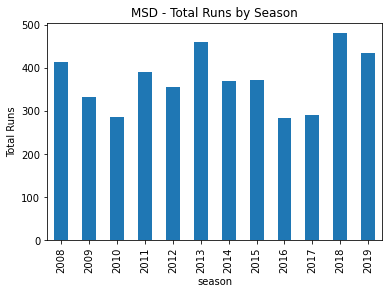

In [33]:
rf.groupby(['season'])['runs'].sum().plot(kind = 'bar')
plt.ylabel('Total Runs')
plt.title('MSD - Total Runs by Season')
plt.show()

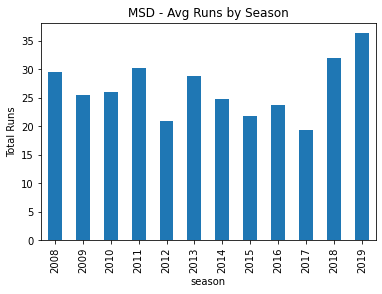

In [34]:
rf.groupby(['season'])['runs'].mean().plot(kind = 'bar')
plt.ylabel('Total Runs')
plt.title('MSD - Avg Runs by Season')
plt.show()

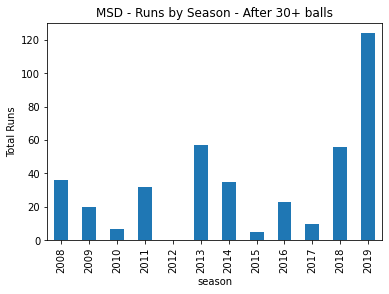

In [35]:
rf.groupby(['season'])['runs_30b_plus'].sum().plot(kind = 'bar')
plt.ylabel('Total Runs')
plt.title('MSD - Runs by Season - After 30+ balls')
plt.show()

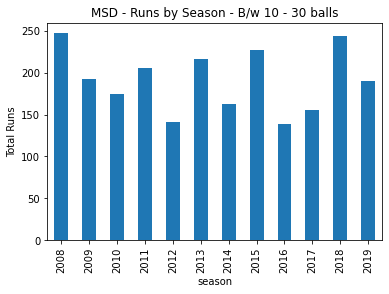

In [37]:
rf.groupby(['season'])['runs_10b_30b'].sum().plot(kind = 'bar')
plt.ylabel('Total Runs')
plt.title('MSD - Runs by Season - B/w 10 - 30 balls')
plt.show()